## 1. Setup

In [1]:
import sys
sys.path.append('../..')

In [2]:
import config
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage
import warnings

from annotations import *
from density_maps import create_and_save_density_maps
from utils.input_output.io import save_np_arrays, load_np_arrays, load_images
from utils.preprocessing.misc import gaussian_smoothing

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

## 2. Datasets

### 2.1 VGG Cells Dataset

In [4]:
DATASET_PATH = '../../datasets/vgg_cells'
TRAIN_PATH = f'{DATASET_PATH}/train'
TRAIN_IMG_PATH = f'{TRAIN_PATH}/images'
TRAIN_GT_DOTS_PATH = f'{TRAIN_PATH}/gt_dots'
TRAIN_GT_DENSITY_MAPS_PATH = f'{TRAIN_PATH}/gt_density_maps'

TEST_PATH = f'{DATASET_PATH}/test'
TEST_IMG_PATH = f'{TEST_PATH}/images'
TEST_GT_DOTS_PATH = f'{TEST_PATH}/gt_dots'
TEST_GT_DENSITY_MAPS_PATH = f'{TEST_PATH}/gt_density_maps'

In [5]:
!rm -rf $TRAIN_GT_DENSITY_MAPS_PATH
!rm -rf $TEST_GT_DENSITY_MAPS_PATH

!mkdir $TRAIN_GT_DENSITY_MAPS_PATH
!mkdir $TEST_GT_DENSITY_MAPS_PATH

In [6]:
print(DATASET_PATH)
print(os.listdir(DATASET_PATH))

../../datasets/vgg_cells
['test', 'train']


In [7]:
print(TRAIN_PATH)
print(os.listdir(TRAIN_PATH))

../../datasets/vgg_cells/train
['gt_density_maps', 'gt_dots', 'images']


In [8]:
train_img_names = sorted(os.listdir(TRAIN_IMG_PATH))
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_img_names = sorted(os.listdir(TEST_IMG_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(f'train split: {len(train_img_names)} images')
print(train_img_names[:3])
print(train_dots_names[:3])

print(f'\ntest split: {len(test_img_names)} images')
print(test_img_names[:3])
print(test_dots_names[:3])

train split: 100 images
['001cell.png', '002cell.png', '003cell.png']
['001dots.png', '002dots.png', '003dots.png']

test split: 100 images
['101cell.png', '102cell.png', '103cell.png']
['101dots.png', '102dots.png', '103dots.png']


In [9]:
train_dots_names = sorted(os.listdir(TRAIN_GT_DOTS_PATH))
test_dots_names = sorted(os.listdir(TEST_GT_DOTS_PATH))

print(TRAIN_GT_DOTS_PATH)
print(train_dots_names[:5])

print(TEST_GT_DOTS_PATH)
print(test_dots_names[:5])

../../datasets/vgg_cells/train/gt_dots
['001dots.png', '002dots.png', '003dots.png', '004dots.png', '005dots.png']
../../datasets/vgg_cells/test/gt_dots
['101dots.png', '102dots.png', '103dots.png', '104dots.png', '105dots.png']


#### Load dots images (.png)

In [10]:
train_dots_images = load_dots_images(TRAIN_GT_DOTS_PATH, train_dots_names)
test_dots_images = load_dots_images(TEST_GT_DOTS_PATH, test_dots_names)

print(len(train_dots_images), train_dots_images[0].shape, train_dots_images[0].dtype,
      train_dots_images[0].min(), train_dots_images[0].max(), train_dots_images[0].sum())

100 (256, 256) float64 0.0 1.0 135.0


#### Create and save density maps (.npy)

In [11]:
create_and_save_density_maps(train_dots_images, config.VGG_CELLS_SIGMA,
                             train_img_names, TRAIN_GT_DENSITY_MAPS_PATH)
create_and_save_density_maps(test_dots_images, config.VGG_CELLS_SIGMA,
                             test_img_names, TEST_GT_DENSITY_MAPS_PATH)

#### Load some train images and density maps

In [12]:
train_images = load_images(TRAIN_IMG_PATH, train_img_names, num_images=3)
print(len(train_images))

3


In [13]:
train_gt_density_maps = load_np_arrays(TRAIN_GT_DENSITY_MAPS_PATH, num=3)
print(len(train_gt_density_maps))

3


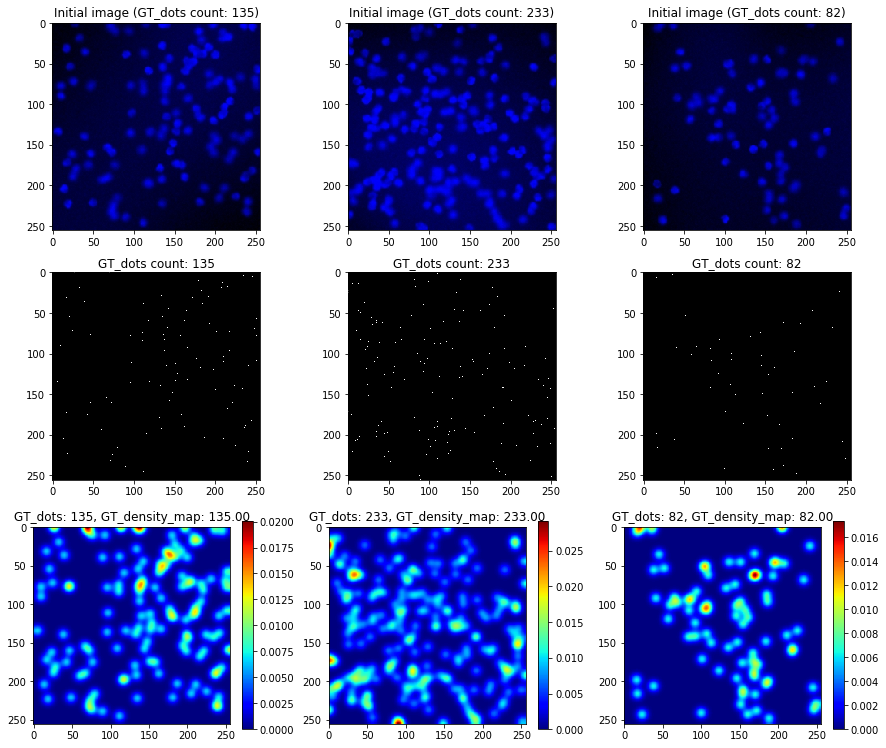

In [14]:
NUM_PLOTS = 3
plt.figure(figsize=(15, 13))

for i in range(NUM_PLOTS):
    count = train_dots_images[i].sum().astype(np.int)
    
    plt.subplot(3, NUM_PLOTS, i + 1)
    plt.title(f'Initial image (GT_dots count: {count})')
    plt.imshow(train_images[i])
    
    plt.subplot(3, NUM_PLOTS, NUM_PLOTS + i + 1)
    plt.title(f'GT_dots count: {count}')
    plt.imshow(train_dots_images[i], cmap='gray')
    
    plt.subplot(3, NUM_PLOTS, 2 * NUM_PLOTS + i + 1)
    plt.title(f'GT_dots: {count}, GT_density_map: {train_gt_density_maps[i].sum():.2f}')
    plt.imshow(train_gt_density_maps[i], cmap='jet')
    plt.colorbar()